In [1]:

## Various packages used in this notebook 
## (and some not used, could be cleaned up if needed)
import numpy as np
import pandas as pd
import re
import os
from itertools import chain

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from scipy.stats import uniform, randint
import matplotlib.pyplot as plt


In [2]:
## The pathway (relative to current "working directory",
## usually where this notebook/python script is run from)
## where the data files are found
workPath = "Almanacs/clean/"

## Constructing an empty table with 3 columns for riddle text,
## file name, and an empty "label" column in case we want to
## add some tag somehow (for supervised learning or whatever)
riddles = pd.DataFrame(columns=['text', 'file', 'label'])

## Iterate through all of the data files
for i, f in enumerate(os.scandir(workPath)):
    ## The next lines (within the for loop) are performed
    ## for each text file in our data
    ## Read the entire text of a file as a string of characters
    with open(f, 'r') as myfile:
        data = myfile.read().replace('\n', '')
        
    ## Split the file into multiple strings, split at any 
    ## number. This is in case the text says "Riddle 1," for
    ## instance. Then we can split riddles apart. 
    data = re.split('1|2|3|4|5|6|7|8|9|0', data)
    
    ## For each of these smaller strings, we want to include
    ## the ones over 5 words in length (words being any text
    ## separated by a space), and over 10 characters in length total
    ## in case some just happen to be random strings of gibberish.
    ## Chose these based on just looking at the riddles for a bit
    for rid in data:
        if len(rid) > 10 and len(rid.split()) > 5:
            riddles = riddles.append({'text':rid.lower(), 'file':f.name}, ignore_index=True)


## I added an arbitrary label for each riddle, being the first 9
## characters in their file name 
riddles['label'] = [file[0:8] for file in riddles['file']]


<bound method NDFrame.head of                                                     text  \
0      щ шхгиш foe leisüee momentsnam bs places picto...   
1       near beginning end foreign title ô hard subst...   
2       boys curtailed hard substance beheaded curtai...   
3                      new married lady deep hoie ground   
4       queer head romanized church tamed like fish f...   
5                  tis repeated way know eer finish lay    
6       persian mythology time tis foursixths limit b...   
7       land grounds boggy flat tis green isle land s...   
8       say f m e vcharade make called john bright sa...   
9      krhers ýi enianst original contributions requi...   
10      kind wheat behead whats common youll instead ...   
11      eht saless pelkins rabetif rangth ni kisls ca...   
12      saucy repeal coolness opinion root used medic...   
13      bird sickly carpenters tool piece ord nance t...   
14      consonant kind tree stay briefly desti tute a...   
15      ch

In [5]:
## Print out the first few riddles to check if the process makes sense
print(riddles.head())

                                                text  \
0  щ шхгиш foe leisüee momentsnam bs places picto...   
1   near beginning end foreign title ô hard subst...   
2   boys curtailed hard substance beheaded curtai...   
3                  new married lady deep hoie ground   
4   queer head romanized church tamed like fish f...   

                                       file     label  
0  Enigmatical_and_Amus_ADTCNH274761200.txt  Enigmati  
1  Enigmatical_and_Amus_ADTCNH274761200.txt  Enigmati  
2  Enigmatical_and_Amus_ADTCNH274761200.txt  Enigmati  
3  Enigmatical_and_Amus_ADTCNH274761200.txt  Enigmati  
4                PUZZLEDOM_DX1901527602.txt  PUZZLEDO  


In [6]:
## Split the data up randomly into training and validation data
## for our prediction task (predict the label based on riddle text)
## This task will help us understand to what extent different
## labels contain different types of text. Our label is currently
## pretty arbitrary, but if we eventually are able to replace it
## with something representing intended gender of audience or something
## more interesting, this could be a useful task!
xTrain, xValid, yTrain, yValid = train_test_split(riddles['text'], riddles['label'],
                                                 test_size=0.33, random_state=12345)

6702
213.94271685761046


(array([  54., 1144., 2563., 1657., 1169.,  902.,  689.,  617.,  497.,
         370.,  349.,  343.,  287.,  288.,  230.,  198.,  196.,  164.,
         156.,  156.,  152.,  125.,  113.,  110.,  106.,   97.,   69.,
          87.,   70.,   67.,   62.,   57.,   53.,   51.,   54.,   43.,
          40.,   41.,   34.,   30.,   31.,   24.,   30.,   46.,   25.,
          25.,   19.,   19.,   14.,   24.]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
         360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
         540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
         720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,
         900.,  920.,  940.,  960.,  980., 1000.]),
 <a list of 50 Patch objects>)

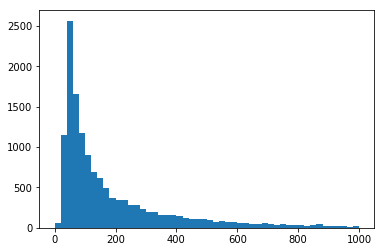

In [9]:
## Here, I was examining the lengths (in # of characters) of each 
## riddle and plotting the distribution, as a sort of quantitative 
## measure of whether or not I thought my filtering worked
## The majority were around 50-200 characters
lens = riddles['text'].apply(lambda rid: len(rid))

## Print out the maximum length (currently 6702, 
## which is super duper long, will have to look more)
print(max(lens))

## Print out the average length, aroudn 214. This seems fine
print(np.mean(lens))

## Plotting a histgram of lengths (only looking between 0 and 1000)
## It also prints out the "bins" which it puts the data into
## but this is not too important.
plt.hist(lens, bins=50, range=(0,1000))

In [176]:
## Printing out the longest riddles
## Seems like they are just pages of information/names.
## Probably should seek to find a way to remove them, but
## this is somewhat hard. Maybe just curate the workset on
## Gale to ignore these, or just manually limit the length 
## to under 1000 characters or something like that
[t for t in riddles['text'] if len(t)>6000]

['puzzledom director tom hoodugust likely hot judge baking weeks july sun blame harvest gold en yellow fields ing aloud busy sick les study win dow western aspect hottest glare rigged screen tissue paper window open driven cooler window ducks dabbling pond envy terribly queer sort barometer comes paraguay strip wood grain running lengthwise glued sliver kind willow grain runs willow wood sensitive rain coming swells strip stands quite upright continued heat shrinks barometer curved like whip time past roundshouldered begun think clerk weather lost key raintap shower does come beautiful smell thirsty earth dont think perfumers attempted imitate strange refreshing odour welcome rain raises like incense parched soil wish try lovely cornfields daresayour friends farmers dispense readily bright poppies big white bindweed azure bluet purple cockle certainly add pictur esque effect crops little bits bright colour tell effectively golden grain france autumn pretty button hole bouquets blossom 

In [11]:

## Translating the data into tf-idf form (slightly better than)
## bag-of-words in my opinion!
tf = TfidfVectorizer(max_features=20000, ngram_range=(1, 1))
riddlesTrainTfidf = pd.DataFrame(tf.fit_transform(xTrain).toarray(), columns=tf.get_feature_names())
riddlesValidTfidf = pd.DataFrame(tf.transform(xValid).toarray(), columns=tf.get_feature_names())

In [12]:
## This is what the data now looks like. Each row is a riddle
## Logically, the riddles are pretty sparse for each word
## However, words with accents or cyrillic characters or
## anything like that might want to be filtered out somehow
## Currently, we look at the top 20,000 words.
riddlesTrainTfidf

,aa,aaa,aaaa,aaaaa,aad,aaron,aay,ab,abandon,abbey,...,ıs,ţo,вее,во,каше,паше,сотез,су,шт,шш
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
## Non-negative matrix factorization is a topic modeling 
## algorithm. I chose to look at 50 topics (kind of a guess)
nmf = NMF(50, random_state=12345, verbose=True, max_iter=100)

In [14]:
## When you run this it prints out "violation: __" up to 100 times
## This is just how the algorithm is converging to it's final 
## topic representation. You can get it to stop printing this by
## changing "verbose=True" to "verbose=False" in the previous cell
riddlesTrainNMF = nmf.fit_transform(riddlesTrainTfidf)
riddlesValidNMF = nmf.transform(riddlesValidTfidf)

violation: 1.0
violation: 0.3386022095765676
violation: 0.23477068856285752
violation: 0.17076408570012738
violation: 0.1113368966075314
violation: 0.07703838229061609
violation: 0.05518620912817044
violation: 0.0396566885609453
violation: 0.029173189544770252
violation: 0.022770322375667937
violation: 0.018834643432203903
violation: 0.016199865775790644
violation: 0.014499334998102015
violation: 0.013237578311309974
violation: 0.012154636879005061
violation: 0.01135798689565402
violation: 0.010695431007236259
violation: 0.010076698108840852
violation: 0.009454320014782823
violation: 0.008663229591651226
violation: 0.00768937744952195
violation: 0.006680156305967222
violation: 0.005791924630313038
violation: 0.0050978072955447165
violation: 0.004581863197869699
violation: 0.004227312400502641
violation: 0.004015404240834848
violation: 0.0038786523215607552
violation: 0.0037724986499439663
violation: 0.003714191522643611
violation: 0.003640250956771048
violation: 0.003485140896758157
vi

In [17]:
## To look at our topics, we can construct a table where each
## topic and its top n topic-associated words are seen 

topicsNMF = pd.DataFrame(nmf.components_, columns=tf.get_feature_names())

topicsNMFAbv = pd.DataFrame()

## This selects the top 10 words in each topic. You can change
## it to any number n by changing [-10:] to [-n:]
for index, row in topicsNMF.iterrows():
    topicsNMFAbv = topicsNMFAbv.append(pd.DataFrame([tf.get_feature_names()[i] for i in np.argsort(row)[-10:]]).T, ignore_index=True)

## Print the table. The words are sorted lowest to highest, 
## left to right
print(topicsNMFAbv)

,0,1,2,3,4,5,6,7,8,9
0,oh,heart,thou,day,fair,thee,bright,sweet,oer,thy
1,riddle,change,ohange,means,tournament,formed,syllable,leaving,form,word
2,island,spain,italy,city,scotland,france,irish,ireland,england,town
3,leave,beheaded,article,fish,body,twice,preposition,verb,instead,behead
4,himself,took,hed,did,boy,does,got,went,said,he
5,petchell,kitchner,friends,double,friend,takes,today,tournament,lead,riddle
6,dear,fair,maid,maiden,saw,face,queen,eyes,love,her
7,received,date,person,required,inserted,publications,copied,address,contributions,accepted
8,works,celebrated,country,author,downwards,double,names,form,finals,initials
9,vehicle,central,twill,metagram,cut,repeat,tail,instead,head,change


0.47660872544837035
0.2561312010596129
0.07382893456344222
-0.0310664947617648


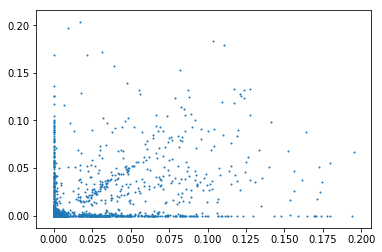

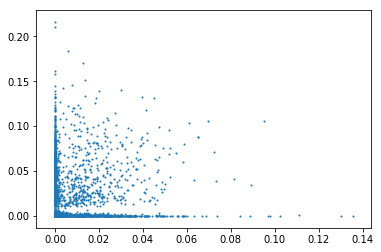

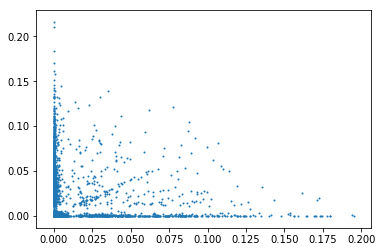

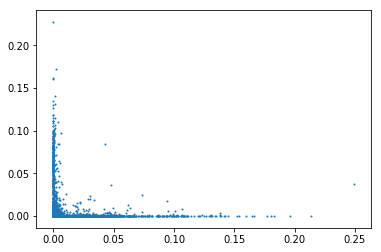

In [26]:
## Plotting each riddle's value for certain topics in the x vs y
## axis. This is kind of a way to see how well x topic is correlated
## with y topic. You can actually correlate a correlation coefficient
## (sometimes things like this are used with genetic data)
## but the graph gives you a good idea! A visible line on the y=x
## kind of indicates that the topics are related.

## Pick topics based on what you think may or may not be related
## in the previous table! 

plt.scatter(y=riddlesTrainNMF[:,38],x=riddlesTrainNMF[:,6], s=1)
print(np.corrcoef(riddlesTrainNMF[:,38], riddlesTrainNMF[:,6])[0, 1])
plt.figure()
plt.scatter(y=riddlesTrainNMF[:,17],x=riddlesTrainNMF[:,33], s=1)
print(np.corrcoef(riddlesTrainNMF[:,17], riddlesTrainNMF[:,33])[0, 1])
plt.figure()
plt.scatter(y=riddlesTrainNMF[:,17],x=riddlesTrainNMF[:,6], s=1)
print(np.corrcoef(riddlesTrainNMF[:,17], riddlesTrainNMF[:,6])[0, 1])
plt.figure()
plt.scatter(y=riddlesTrainNMF[:,18],x=riddlesTrainNMF[:,43], s=1)
print(np.corrcoef(riddlesTrainNMF[:,18], riddlesTrainNMF[:,43])[0, 1])


In [147]:
## Training an SVM classifier on the arbitary label
## SVM is kind of a random choice. It isn't really
## specifically appropriate for this application, but
## it is a generally very powerful relatively-simple
## machine learning model, and it offers a slight better
## performance (validation accuracy and f1_score) than
## the RFC, but it does not give feature importance.
svm = LinearSVC(verbose=True, C=8)
svm.fit(riddlesTrainNMF, yTrain)

[LibLinear]

LinearSVC(C=8, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=True)

In [149]:
## This prints out the validation accuracy and f1_score
## of the SVM classifier. 
preds = svm.predict(riddlesValidNMF)
print(accuracy_score(preds, yValid))
print(f1_score(preds, yValid, average='weighted'))

0.39176369124622684
0.4743772931347178


/Users/tomascorey/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [155]:
## This method produces a confusion matrix, which is
## a way of seeing which classes were commonly mis-classified
## as each other/which were most accurately classified.
## May be useful in the future! 
conf = confusion_matrix(preds, yValid)

(82, 82)

In [156]:
## Printing out the confusion matrix! with 82 classes,
## this is kind of hard to interepret/visualize, but 
## with other labels, I think it would be a useful tool
pd.DataFrame(conf, columns=sorted(set(yValid)), index=sorted(set(yValid)))


,AMUSING_,ANSWERS_,ANSWER_D,ANSWER_T,AN_ACTIN,A_CHRIST,A_CONVER,A_FEW_RI,A_MISSIO,A_RIDDLE,...,SIX_PRIZ,Solution,THE_CHIL,THE_RIDD,TO_PUZZL,TWENTY-O,The_Puzz,The_Ridd,The__Puz,Trackers
AMUSING_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANSWERS_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANSWER_D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANSWER_T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AN_ACTIN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A_CHRIST,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A_CONVER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A_FEW_RI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A_MISSIO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A_RIDDLE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
## Similarly to the SVM classifier, this is a random forest 
## classifier (RFC), which will predict the labels based on 
## topic prevalence. the RFC object that this creates will
## give us feature importances, allowing us to see which
## topics are relevant to the labels!

rfc = RandomForestClassifier(n_estimators=1000, max_depth=10, verbose=2)
rfc.fit(riddlesTrainNMF, yTrain)

building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
bui

building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tre

building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tre

building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   35.9s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)

In [164]:
## Performance metrics for the RFC (same as the SVM before)
preds = rfc.predict(riddlesValidNMF)
print(accuracy_score(preds, yValid))
print(f1_score(preds, yValid, average='weighted'))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.37882708063820614
0.47759179257603085


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.3s finished
/Users/tomascorey/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [165]:
## This is the list (from high to low) of importance of the topics
## (the array of topics is 0-indexed, meaning "1" here actually means)
## the second row in the topic-word table from before!
np.argsort(-1*rfc.feature_importances_)[:20]

array([ 1, 18, 26,  0, 32, 14, 20, 39, 16, 24, 12, 15, 11, 17, 13,  5, 48,
        8, 46, 47])

(14053, 3)